In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# 1. McCulloch-Pitts neuron


In [2]:
def bool_neuron_activated(theta, weights, inputs):
  """
  Calculates how many time the neuron gets activated
  """
  bool_activated = []
  for i in (inputs.dot(weights)-theta):
    if i >= 0:
      bool_activated.append(1)
    else:
      bool_activated.append(0)

  return bool_activated

num_experiment = 3  # how many times you want to run a random stimuli experiment
theta = 0  # neuron threshold
weights = np.array([3,2,2])  # weights
inputs = np.random.choice([-1,1], size=(num_experiment,2))
neuron_standard = np.ones((inputs.shape[0],1))*-1
inputs = np.append(neuron_standard, inputs, axis=1)  # inputs

print("inputs:", inputs,"\n", "weights:", weights, "\n", "threshold:", theta,"\n")
print("activated:", bool_neuron_activated(theta, weights, inputs))



inputs: [[-1. -1.  1.]
 [-1. -1. -1.]
 [-1. -1.  1.]] 
 weights: [3 2 2] 
 threshold: 0 

activated: [0, 0, 0]


# 2. Activation functions

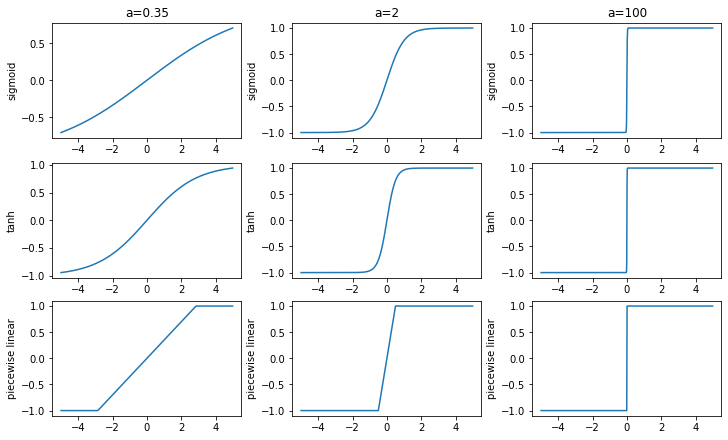

In [3]:
x = np.arange(-5, 5, 0.01)

def sigmoid(x, **params):
    a = params.get('a', 1)
    return 2 / (1 + np.exp(-a*x)) - 1

def tanh(x, **params):
    a = params.get('a', 1)
    return np.tanh(a*x)

def piecewise_linear(x, **params):
    a = params.get('a', 4)
    return np.vectorize(lambda x: 1 if x >= 1/a else (-1 if x <= -1/a else a*x), otypes=[float])

# plot the function using three different values for a>0
fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)

j = 0
for a in [0.35,2,100]:
    axs[0,j].set_title(f'a={a}')
    axs[0,j].plot(x, sigmoid(x, a=a))
    axs[0,j].set_ylabel('sigmoid')

    axs[1,j].plot(x, tanh(x, a=a))
    axs[1,j].set_ylabel('tanh')
    
    axs[2,j].plot(x, piecewise_linear(x, a=a)(x))
    axs[2,j].set_ylabel('piecewise linear')

    j += 1

# apply global settings to all axs
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

plt.show()

# 3. Rosenblatt’s perceptron

In [4]:
class Rosenblatt_perceptron:
    def __init__(self):
        pass

    def predict(self, X, weights):
        return calc_heaviside(X.dot(weights))

    def train(self, inputs, output, epochs=100):
        """
        inputs : 2D array. each row corresponds to one training example
        output : 1D array. label (0 or 1)

        returns: trained perceptron model.
        """

        n_features = inputs.shape[1]   # features
        weights = np.zeros((n_features, ))  # initial weight vector
        learning_rate = 1

        # Train the neuron over multiple epochs UNTIL no more weight changes occur
        for i in range(epochs):

            errors = 0  # number of errors

            for xi, desired_response in zip(inputs, output):
                error = desired_response - self.predict(xi, weights)

                if error != 0:
                    weights += learning_rate * error * xi
                    errors += 1

            if errors == 0:
                break

        return weights


mu, sigma = 0, 0.5  # mean and standard deviation

# Our training set:
num_experiment = 1000

inputs = np.random.normal(mu, sigma, size=(num_experiment,2))  # inputs drawn from a standard normal distribution
neuron_standard = np.ones((inputs.shape[0],1))*-1
inputs = np.append(neuron_standard, inputs, axis=1)  # inputs

output_func = np.vectorize(lambda x1, x2: 1 if x2 >= 0.5 - x1 else 0, otypes=[int])
output = output_func(inputs[:,1], inputs[:,2])


# heaviside-function
calc_heaviside = lambda x: np.heaviside(x, 1).astype(int)
perceptron = Rosenblatt_perceptron()

trained_weights = perceptron.train(inputs, output)


I used for the learning rate η=1 because I rather train over more epochs than overshoot.  

In [5]:
validation_num_experiment = 100  # rerun the experiment

validation_inputs = np.random.normal(mu, sigma, size=(validation_num_experiment,2))  # inputs drawn from a standard normal distribution
validation_standard = np.ones((validation_inputs.shape[0],1))*-1
validation_inputs = np.append(validation_standard, validation_inputs, axis=1)  # inputs

validation_output = output_func(validation_inputs[:,1], validation_inputs[:,2])

In [6]:
# predict the output of the test dataset
output_predicted = perceptron.predict(validation_inputs, trained_weights)

error = validation_output - output_predicted
error_num = [x for x in error if x != 0]

print("Run ", validation_num_experiment, " tests and ", len(error_num), " of them failed.")

Run  100  tests and  1  of them failed.


As we can see, our neuron can indeed perfrom the trained comparison function

## TODO: (d) Plot the training set and label each input vector according to its response class. Superimpose the weight vector on the same plot (think about the bias term w0). Explain in what sense the weight vector is optimal.